<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo">
</center>


# Singular-Value Decomposition (SVD)

Estimated time needed: **45** minutes

You are a computer vision engineer and a self-driving car company has hired you.  The company would like you to remove all objects other than the street from several security videos using singular value decomposition to help test their vision system. You will use the  <a href="www.svcl.ucsd.edu/projects/background_subtraction/ucsdbgsub_dataset.html"> Background Subtraction in Dynamic dataset  </a> from the  Statistical Visual Computing Laboratory (SVCL) at UCSD.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/15104006386_1bf6bfe96a_b.jpeg" width="600">



## Table of Contents

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="#Defining-Helper-Functions">Defining Helper Functions</a></li>
        </ol>
    </li>
    <li><a href="#Singular Value Decomposition">Singular Value Decomposition</a></li>
    <li>
        <a href="#Truncated SVD">Truncated SVD</a>
        <ol>
            <li><a href="#Truncated SVD in Sklearn">Truncated SVD in Sklearn</a></li>
            <li><a href="#Background Model using SVD">Background Model using SVD</a></li>
        </ol>
    </li>
    <li>
        <a href="#Exercises">Exercises</a>
        <ol>
            <li><a href="#Exercise 1">Exercise 1</a></li>
            <li><a href="#Exercise 2">Exercise 2</a></li>
            <li><a href="#Exercise 3">Exercise 3</a></li>
            <li><a href="#Exercise 4">Exercise 4</a></li>
            <li><a href="#Exercise 5">Exercise 5</a></li>
        </ol>
    </li>
    <li><a href="#SVD from Scratch (optional)">SVD from Scratch (optional)</a></li>
    <li><a href="#Relationship between SVD and PCA (optional)">Relationship between SVD and PCA (optional)</a></li>
    
 </ol>    
     
  


***


## Objectives


*   **Understand** what is SVD in terms of Matrix Decomposition
*   **Understand** Truncated SVD
*   **Apply** Truncated SVD  using numpy and Sklearn
*   **Apply** Truncated SVD  to real data
*   **Understand** the relationship between SVD and PCA (optional)


## Datasets


Download and unzip the datasets:


In [30]:
# Cài đặt thư viện skillsnetwork
!pip install skillsnetwork
# Import thư viện skillsnetwork
import skillsnetwork
# Tải xuống và giải nén tập dữ liệu "traffic.tar.gz"
await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/traffic.tar.gz")
# Tải xuống và giải nén tập dữ liệu "peds.tar.gz"
await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/peds.tar.gz")
# Tải xuống và giải nén tập dữ liệu "boats.tar.gz"
await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/boats.tar.gz")

FileExistsError: Error: File '/content/traffic' already exists.
If you want to overwrite any existing files, use prepare(..., overwrite=True).

## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for visualizing the data.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for machine learning and machine-learning-pipeline related functions.


### Installing  required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Anaconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [31]:
# Tất cả các thư viện cần thiết cho phòng thí nghiệm này được liệt kê dưới đây. Các thư viện đã cài đặt sẵn trên Skills Network Labs được chú thích.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Lưu ý: Nếu môi trường của bạn không hỗ trợ "!mamba install", hãy sử dụng "!pip install pandas==1.3.4 ..."

Install <a href="https://www.sympy.org/en/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01">SymPy </a> for printing matrices


In [32]:
# Cài đặt thư viện SymPy để in ma trận
!conda install -c anaconda sympy -y

/bin/bash: line 1: conda: command not found


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [33]:
# Ngăn chặn cảnh báo:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [45]:
import pandas as pd # Import thư viện pandas để quản lý dữ liệu
import numpy as np # Import thư viện numpy cho các phép toán toán học


from os import listdir,getcwd # Import các hàm listdir và getcwd từ module os
from os.path import isfile, join # Import các hàm isfile và join từ module os.path
from random import randint # Import hàm randint từ module random
from PIL import Image # Import lớp Image từ thư viện PIL

import seaborn as sns # Import thư viện seaborn để trực quan hóa dữ liệu
import matplotlib.pylab as plt # Import module pylab từ matplotlib để trực quan hóa dữ liệu
%matplotlib inline
# Hiển thị biểu đồ trực tiếp trong notebook

from sklearn.decomposition import PCA # Import lớp PCA từ sklearn.decomposition
from sklearn.decomposition import TruncatedSVD # Import lớp TruncatedSVD từ sklearn.decomposition


from sympy import Matrix, init_printing,Symbol # Import các lớp và hàm từ thư viện sympy
from numpy.linalg import qr,eig,inv,matrix_rank,inv,svd # Import các hàm từ numpy.linalg cho đại số tuyến tính
init_printing() # Khởi tạo in đẹp cho sympy

### Defining Helper functions


In [35]:
# Hàm để lấy ma trận dữ liệu từ các tệp hình ảnh trong một thư mục
def get_data_Matrix (mypath="peds"):
    cwd = getcwd() # Lấy thư mục làm việc hiện tại

    mypath=join(cwd,mypath) # Tạo đường dẫn đầy đủ đến thư mục dữ liệu
    # Lấy danh sách các tệp hình ảnh trong thư mục (không bao gồm các tệp ẩn)
    files = [ join(mypath,f) for f in listdir(mypath) if isfile(join(mypath, f)) and f.startswith(".")==False]
    # Đọc hình ảnh đầu tiên để lấy kích thước
    img = Image.open(files[0])
    I=np.array(img)
    # Output Images

    Length,Width=I.shape # Lấy chiều dài và chiều rộng của hình ảnh

    # Tạo ma trận X với số hàng bằng số tệp và số cột bằng số pixel trong mỗi hình ảnh
    X=np.zeros((len(files),Length*Width))
    # Lặp qua từng tệp hình ảnh
    for i,file in enumerate(files):
        img = Image.open(file) # Mở hình ảnh
        I=np.array(img) # Chuyển hình ảnh thành mảng numpy
        X[i,:]=I.reshape(1,-1) # Làm phẳng mảng hình ảnh và gán vào một hàng của ma trận X
    # Trả về ma trận X, chiều dài và chiều rộng của hình ảnh
    return X,Length,Width

## Singular Value Decomposition
The Singular-Value Decomposition, or SVD for short, will decompose a real or complex $N × D$ matrix $\mathbf{X}$ of rank $r$ as follows:


$$\mathbf{X}= \mathbf {US V^{T}}$$


In many applications  $N \ge D$, but SVD can be used for any matrix $\mathbf{X}$. For example, in computer vision and image processing tasks we sometimes have $D \ge N$.


The matrix $\mathbf{S}$ contains the nonnegative <b>singular values</b> of $\mathbf{X}$, with diagonal entries ${\sigma _{i}}$ else $0$, the entries are ordered by importance in descending order with respect to $i$, i.e:

$$\sigma _{1}>\sigma _{2},..>\sigma _{r}$$


The matrix $\mathbf {U}$ is $NxD$ and  has the orthornormal columns  $\mathbf{u}_{1}, ..., \mathbf{u}_{D} $ called the <b>left singular vectors</b>.

The matrix $\mathbf {V}$ is $DxD$ and has the orthornormal columns $\mathbf{v}_{1}, ..., \mathbf{v}_{D}$ called the <b>right singular vectors</b>  (note  that $\mathbf{V}$ transpose, $\mathbf {V^{T}}$ is returned as output in numpy's `svd` function).


 SVD decomposition returns the full shape of a non-square matrix, the non colored  parts of the decomposition **N-D** terms in the matrix U are zeros, we see many of the squares are redundant.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/matrix.png" width="600" alt="full svd">


Consider the matrix $\mathbf{X}$:


In [36]:
# Định nghĩa ma trận X
X=np.array([[1.0,2],[2,1],[3,3]])
# In ma trận X bằng SymPy
Matrix(X)

⎡1.0  2.0⎤
⎢        ⎥
⎢2.0  1.0⎥
⎢        ⎥
⎣3.0  3.0⎦

We can perform SVD on any matrix in numpy by using the function `svd` from `numpy.linalg`:


In [37]:
# Thực hiện phân tích SVD trên ma trận X
# full_matrices=False để lấy phiên bản "skinny" của SVD
U, s, VT =svd(X, full_matrices=False)

When $\mathbf{X}$ is a 2D array, it is factorized as $U\times np.diag(s)\times V^T$, where $U$ and $V^T$ are 2D orthogonal  matrices  and $s$ is an 1D array of $\mathbf{X}$'s singular values. When $\mathbf{X}$ is higher-dimensional (such as sparse matrices), the parameter ```full_matrices=False```, the skinny SVD is used and the zero elements are dropped. This can be summarized in the following image:


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/skinny-SVD.png" width="600" alt="skinnysvd">


We have the <b>left singular vectors</b> of $\mathbf{X}$:


In [10]:
Matrix(U)

⎡-0.408248290463863    0.707106781186548  ⎤
⎢                                         ⎥
⎢-0.408248290463863   -0.707106781186547  ⎥
⎢                                         ⎥
⎣-0.816496580927726  -1.57698996923239e-16⎦

We have the <b>singular values</b> of $\mathbf{X}$, as the output is an 1-D array we use the function ```np.diag``` to convert the output into a diagonal matrix:


In [38]:
# Chuyển mảng giá trị số ít s thành ma trận đường chéo S
S=np.diag(s)

# In ma trận S bằng SymPy
Matrix(S)

⎡5.19615242270663  0.0⎤
⎢                     ⎥
⎣      0.0         1.0⎦

Finally we have the <b>right singular vectors</b> of $\mathbf{X}$, as the output is transposed they are the rows of matrix ```VT```:


In [39]:
# In ma trận VT (chuyển vị của các vector riêng bên phải) bằng SymPy
Matrix(VT)

⎡-0.707106781186547  -0.707106781186547⎤
⎢                                      ⎥
⎣-0.707106781186547  0.707106781186547 ⎦

We can reconstruct the matrix $\mathbf{X}$:


In [40]:
# Tái tạo ma trận X từ các thành phần SVD (U, S, VT)
X_=U@S@VT
# Làm tròn các giá trị trong ma trận tái tạo
X_=np.round(X_)
# In ma trận tái tạo X_ bằng SymPy
Matrix(X_)

⎡1.0  2.0⎤
⎢        ⎥
⎢2.0  1.0⎥
⎢        ⎥
⎣3.0  3.0⎦

It may be more intuitive if you think of SVD reconstructing the matrix as a linear combination of $r$ rank-1 matrices and the associated singular values ($r$ is the rank of $\mathbf{X}$):


$$\mathbf{X}=\sum_{i=1}^{r}\sigma_i\mathbf{u}_i\mathbf{v}_i^{T}$$


In [41]:
# Tái tạo ma trận X bằng cách sử dụng tổng có trọng số của các ma trận hạng 1
# Lấy thành phần đầu tiên của SVD (giá trị số ít lớn nhất, vector riêng bên trái và bên phải tương ứng)
# Nhân giá trị số ít với tích ngoài của vector riêng bên trái và bên phải
# Lấy thành phần thứ hai của SVD
# Cộng hai ma trận hạng 1 đã tạo
X_2=s[0]*U[:,0:1]@VT[0:1,:]+s[1]*U[:,1:2]@VT[1:2,:]
# In ma trận tái tạo X_2 bằng SymPy
Matrix(X_2)

⎡1.0  2.0⎤
⎢        ⎥
⎢2.0  1.0⎥
⎢        ⎥
⎣3.0  3.0⎦

The same matrix is returned!


## Truncated SVD


A singular value $\sigma_i$ can be thought of as a measure of redundancy of a rank-1 matrix produced by $\mathbf{u}_i\mathbf{v}_i^T$. A smaller $\sigma_i$ means the associated rank-1 matrix, which can be interpreted as one "ingredient" of $\mathbf{X}$, is of less importance in terms of the amount of variance/information it preserves.


As the information contained by the matrix becomes less important or redundant, its corresponding singular value $\sigma_i$ approaches zero. If we just keep the most important "ingredients" of $\mathbf{X}$, we can approximate $\mathbf{X}$ by a weighted sum of $L$ rank-1 matrices where  $L<r$:


$$\mathbf{X}\approx\sum_{i=1}^{L}\sigma_i\mathbf{u}_i\mathbf{v}_i^{T}$$


Consider the following matrix, the columns are almost linearly independent:


In [42]:
# Định nghĩa một ma trận X khác với các cột gần như phụ thuộc tuyến tính
X=np.array([[1,2],[2,4],[4,8.0001]])
# In ma trận X bằng SymPy
Matrix(X)

⎡1.0   2.0  ⎤
⎢           ⎥
⎢2.0   4.0  ⎥
⎢           ⎥
⎣4.0  8.0001⎦

We perform SVD:


In [43]:
# Thực hiện phân tích SVD trên ma trận X mới
U, s, VT =svd(X, full_matrices=False)
# Chuyển mảng giá trị số ít s thành ma trận đường chéo S
S=np.diag(s)
# In ma trận S bằng SymPy
Matrix(S)

⎡10.2470288381327          0.0        ⎤
⎢                                     ⎥
⎣      0.0         2.18216227635996e-5⎦

We see the first rank-1 matrix is almost identical to the Matrix:


In [44]:
# Tái tạo ma trận X bằng cách chỉ sử dụng thành phần SVD đầu tiên (L=1)
# Lấy giá trị số ít đầu tiên
# Lấy vector riêng bên trái đầu tiên
# Lấy vector riêng bên phải đầu tiên (đã chuyển vị)
# Nhân giá trị số ít với tích ngoài của vector riêng bên trái và bên phải
X_hat=np.round(s[0]*U[:,0:1]@VT[0:1,:])
# In ma trận tái tạo X_hat bằng SymPy
Matrix(X_hat)

⎡1.0  2.0⎤
⎢        ⎥
⎢2.0  4.0⎥
⎢        ⎥
⎣4.0  8.0⎦

Instead of adding the rank-1 matrices, we can achieve the same result with matrix multiplications. Select the top $L$ singular values, top $L$ left and right singular vectors, we can approximate $\mathbf{X}$ by:


$$\mathbf{X} \approx \mathbf{U}_{:,1:L} \mathbf{S}_{1:L,1:L} \mathbf{V}_{1:L,:}^{T}$$


Summarized in the following image:


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/trunked_-svd.png" width="600" alt="skinnysvd">


We can code the values in numpy:


In [46]:
# Thực hiện Truncated SVD với L=1
L=1
# Tái tạo ma trận X bằng cách chỉ sử dụng L thành phần SVD hàng đầu
Xhat=U[:,:L]@S[0:L,0:L]@VT[:L,:]
# In ma trận tái tạo Xhat bằng SymPy
Matrix(Xhat)

⎡0.999992380977777  2.00000380947483⎤
⎢                                   ⎥
⎢1.99998476195556   4.00000761894966⎥
⎢                                   ⎥
⎣4.00000952368254   8.00009523820408⎦

We can use the singular values to determine the reconstruction error, similar to the **cumulative explained variance**, we will go into the exact relationship later. The term is given by:


$$C(L)=\dfrac{\sum_{i=1}^{L}\sigma_i}{\sum_{i=1}^{r}\sigma_i}$$


In [47]:
# Tính toán và in tỷ lệ phương sai (thông tin) được giải thích bởi L giá trị số ít hàng đầu
print(f"Với {L} giá trị số ít và các vector số ít tương ứng, {s[0:L]/s.sum()} phương sai của X được giải thích")

Với 1 giá trị số ít và các vector số ít tương ứng, [0.99999787] phương sai của X được giải thích


We can plot the **cumulative explained variance** as a function of $L$ (the number of singular values chosen).


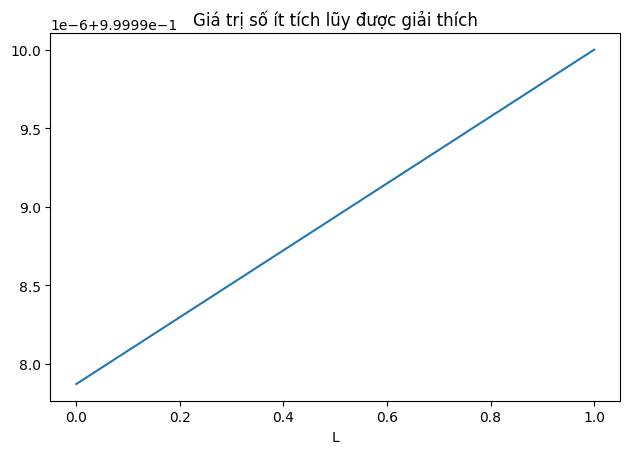

In [48]:
# Vẽ biểu đồ phương sai tích lũy được giải thích theo số lượng giá trị số ít L
plt.figure() # Tạo một hình vẽ mới
plt.plot(np.cumsum(s)/s.sum()) # Vẽ biểu đồ tổng tích lũy của các giá trị số ít (được chuẩn hóa)
plt.xlabel('L') # Đặt nhãn trục x là 'L'
plt.title('Giá trị số ít tích lũy được giải thích') # Đặt tiêu đề cho biểu đồ
plt.tight_layout() # Tự động điều chỉnh các tham số subplots để vừa với hình
plt.show() # Hiển thị biểu đồ

### Truncated SVD in Sklearn


Truncated SVD  performs **linear  PCA**, a method of dimensionality reduction. Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with sparse matrices efficiently. We will explore the relationship between PCA and SVD later on.

Some important parameters in `sklearn.decomposition.TruncatedSVD` that are worth noting:

- `n_components`: int, default=2; Desired dimensionality of output data. If algorithm=’arpack’, must be strictly less than the number of features. If algorithm=’randomized’, must be less than or equal to the number of features. The default value is useful for visualisation.

- `algorithm`: {‘arpack’, ‘randomized’}, default=’randomized’; SVD solver to use. Either “arpack” for the ARPACK wrapper in SciPy (scipy.sparse.linalg.svds), or “randomized” for the randomized algorithm due to [Halko (2009)](https://arxiv.org/abs/0909.4061?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01).

- `n_iter`: int, default=5; Number of iterations for randomized SVD solver. Not used by ARPACK. The default is larger than the default in [randomized_svd](https://scikit-learn.org/stable/modules/generated/sklearn.utils.extmath.randomized_svd.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01#sklearn.utils.extmath.randomized_svd) to handle sparse matrices that may have large slowly decaying spectrum.

_Read more in the scikit-learn documentation of [TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01)._


First we create a ```TruncatedSVD``` object setting ```n_components=1``` this is analogous to ```L=1``` :


In [49]:
# Tạo đối tượng TruncatedSVD với n_components=1 và random_state=42
svd_ = TruncatedSVD(n_components=1, random_state=42)

```fit_transform```  behaves like the projections onto the principle components


In [50]:
# Áp dụng Truncated SVD vào ma trận X và chuyển đổi dữ liệu
# Kết quả Z là phép chiếu của X lên không gian con được xác định bởi các thành phần chính
Z=svd_.fit_transform(X)
# In ma trận Z
Z

array([[2.23606798],
       [4.47213595],
       [8.94436135]])

With `inverse_transform`, we can find the approximation of the original $X$:


In [51]:
# Áp dụng phép biến đổi ngược để tái tạo ma trận X từ phép chiếu Z
Xhat=svd_.inverse_transform(Z)
# In ma trận tái tạo Xhat (đã làm tròn) bằng SymPy
Matrix(np.round(Xhat))

⎡1.0  2.0⎤
⎢        ⎥
⎢2.0  4.0⎥
⎢        ⎥
⎣4.0  8.0⎦

### Background Model using SVD


In this section you will use SVD for developing a Background Model.

Background subtraction is a widely used approach to detect moving objects in a sequence of frames from static cameras. The base in this approach is detecting moving objects from the differences between the current frame and reference frame, which is often called 'Background Image' or 'Background Model'.

The function ```get_data_Matrix```  will create a Design  matrix ```X``` where each row corresponds to a flattened image of a sidewalk with pedestrians recorded by a camera.

```Length``` and ```Width``` are the rectangular dimensions of the image. We will use SVD to remove the pedestrians:


In [52]:
# Lấy ma trận dữ liệu hình ảnh từ thư mục "peds"
X,Length,Width=get_data_Matrix(mypath="peds")

There are 170 images in the dataset and each is $152\times 232$ (32654 pixels).


In [53]:
# In hình dạng của ma trận dữ liệu X và kích thước của hình ảnh (Chiều dài, Chiều rộng)
X.shape, Length, Width

((170, 35264), 152, 232)

We can plot five random images from the matrix:


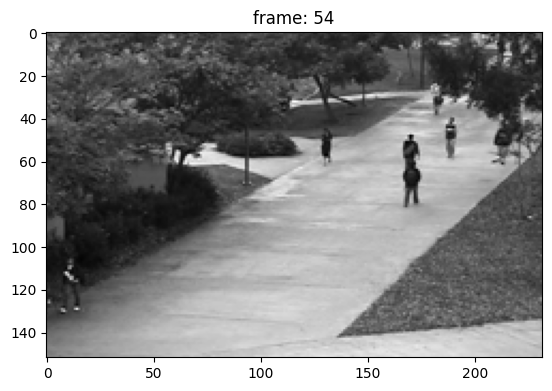

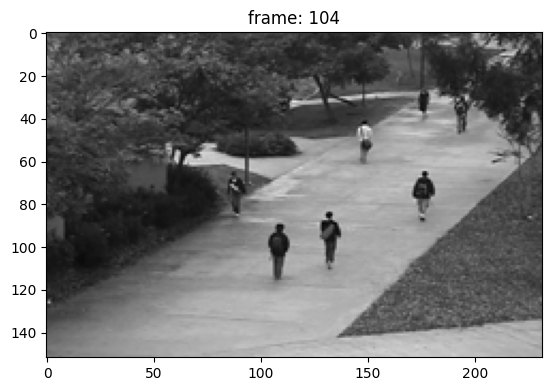

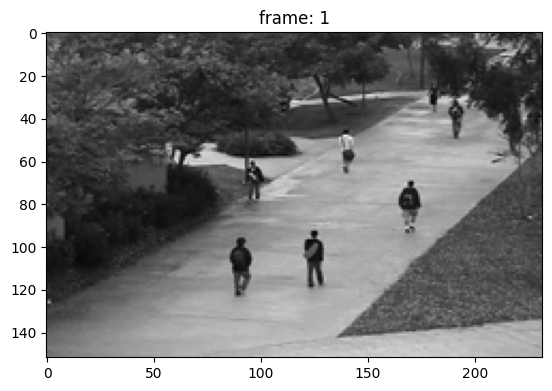

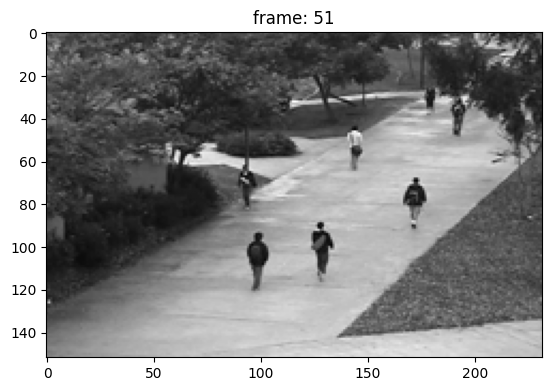

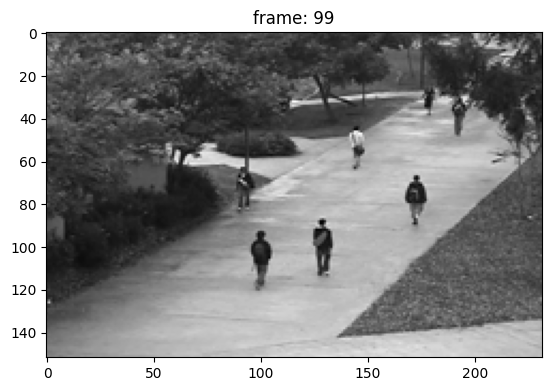

In [54]:
# Vẽ 5 hình ảnh ngẫu nhiên từ ma trận dữ liệu X
for i in range(5):
    frame=randint(0, X.shape[0]-1) # Chọn một chỉ số hàng ngẫu nhiên (một khung hình ngẫu nhiên)
    # Hiển thị hình ảnh tương ứng với hàng đã chọn. reshape nó về kích thước ban đầu (Length, Width)
    plt.imshow(X[randint(0, X.shape[0]-1),:].reshape(Length,Width),cmap="gray") # Sử dụng cmap="gray" để hiển thị ảnh xám
    plt.title("frame: "+str(frame)) # Đặt tiêu đề cho biểu đồ là số khung hình
    plt.show() # Hiển thị biểu đồ

We perform SVD on the images:


In [55]:
# Thực hiện phân tích SVD trên ma trận dữ liệu hình ảnh X
# full_matrices=False để lấy phiên bản "skinny" của SVD
U, s, VT =svd(X, full_matrices=False)

In [56]:
# Chuyển mảng giá trị số ít s thành ma trận đường chéo S
S=np.diag(s)

We can reconstruct the image using Truncated SVD with ```L=1``` and assign the result to to ```Xhat```:


In [57]:
# Thực hiện Truncated SVD với L=1 để tạo mô hình nền
L=1
# Tái tạo ma trận X bằng cách chỉ sử dụng thành phần SVD đầu tiên
Xhat=U[:,:L]@S[0:L,0:L]@VT[:L,:]

If we plot the first image, we will see the pedestrians are gone:


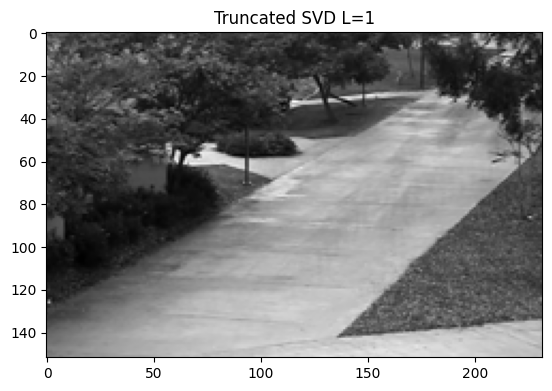

In [58]:
# Hiển thị hình ảnh đầu tiên từ ma trận Xhat (mô hình nền)
plt.imshow(Xhat[0,:].reshape(Length,Width),cmap="gray") # Sử dụng cmap="gray" để hiển thị ảnh xám
plt.title('Truncated SVD L=1') # Đặt tiêu đề cho biểu đồ
plt.show() # Hiển thị biểu đồ

## Exercises


### Exercise 1

Reshape the 5 random rows of ```Xhat``` and plot them as images.


In [59]:
# TODO: Viết code để hiển thị 5 hàng ngẫu nhiên từ Xhat


<details>
    <summary>Click here for Solution</summary>

```python
for i in range(5):
    frame=randint(0, X.shape[0]-1)
    plt.imshow(Xhat[randint(0, X.shape[0]-1),:].reshape(Length,Width),cmap="gray")
    plt.title("frame: "+str(frame))
    plt.show()
```

</details>


From the exercise above that the rows of the matrix ```Xhat``` are all similar . The ```L``` determines the reconstruction properties.


### Exercise 2

Plot the Cumulative explained variance against the number of singular values $L$.


In [60]:
# TODO: Viết code để vẽ biểu đồ phương sai tích lũy được giải thích theo số lượng giá trị số ít L


<details>
    <summary>Click here for Solution</summary>

```python
plt.plot(np.cumsum(s)/s.sum())
plt.xlabel('L')
plt.title('Cumulative explained  singular value')
plt.show()
```

</details>


### Exercise 3
Perform Truncated SVD with ```L=10``` and plot 5 random rows of Xhat.


In [61]:
# TODO: Viết code để thực hiện Truncated SVD với L=10 và vẽ 5 hàng ngẫu nhiên từ Xhat

<details>
    <summary>Click here for Solution</summary>

```python
L=10
Xhat=U[:,:L]@S[0:L,0:L]@VT[:L,:]
for i in range(5):
    frame=randint(0, X.shape[0]-1)
    plt.imshow(Xhat[randint(0, X.shape[0]-1),:].reshape(Length,Width),cmap="gray")
    plt.title("frame: "+str(frame))
    plt.show()
```
</details>


### Exercise 4
 Apply   ```get_data_Matrix``` with ```mypath="boats"```, plot 5 random boat images. Then perform Truncated SVD using the function ```svd``` with  L=1 and plot the first row of ```Xhat``` as an image.


In [62]:
# TODO: Viết code để áp dụng get_data_Matrix với "boats", vẽ 5 hình ảnh ngẫu nhiên,
# thực hiện Truncated SVD với L=1 và vẽ hình ảnh đầu tiên từ Xhat

<details>
    <summary>Click here for Solution</summary>

```python
X,Length,Width=get_data_Matrix (mypath="boats")

for i in range(5):
    frame=randint(0, X.shape[0]-1)
    plt.imshow(X[randint(0, X.shape[0]-1),:].reshape(Length,Width),cmap="gray")
    plt.title("frame: "+str(frame))
    plt.show()
    
U, s, VT =svd(X, full_matrices=False)
L=1
Xhat=U[:,:L]@S[0:L,0:L]@VT[:L,:]

plt.imshow(Xhat[0,:].reshape(Length,Width),cmap="gray")
plt.title('Truncated SVD L=1')

plt.show()
```

</details>


### Exercise 5
Apply   ```get_data_Matrix``` with ```mypath="traffic"```, plot 5 random images. Then perform Truncated SVD  using `TruncatedSVD` with ```n_components=1``` and plot the first row of ```Xhat``` as an image.


In [63]:
# TODO: Viết code để áp dụng get_data_Matrix với "traffic", vẽ 5 hình ảnh ngẫu nhiên,
# thực hiện Truncated SVD bằng TruncatedSVD với n_components=1 và vẽ hình ảnh đầu tiên từ Xhat


<details>
    <summary>Click here for Solution</summary>

```python
X,Length,Width=get_data_Matrix (mypath="traffic")

for i in range(5):
    frame=randint(0, X.shape[0]-1)
    plt.imshow(X[randint(0, X.shape[0]-1),:].reshape(Length,Width),cmap="gray")
    plt.title("frame: "+str(frame))
    plt.show()
    
svd_ = TruncatedSVD(n_components=1, n_iter=7, random_state=42)
score=svd_.fit_transform(X)
Xhat=svd_.inverse_transform(score)
plt.imshow(Xhat[0,:].reshape(Length,Width),cmap="gray")
plt.imshow(Xhat[0,:].reshape(Length,Width),cmap="gray")
plt.title('Truncated SVD L=1')

plt.show()
plt.show()

```

</details>


##  SVD from Scratch (optional)


There are several ways to derive SVD, let's do one that is simple to code and related to PCA. We have the SVD factorization:


$$\mathbf{X}= \mathbf {US V^{T}}$$


In [64]:
# Định nghĩa ma trận X
X=np.array([[1,2],[2,4],[4,8]])
# In ma trận X bằng SymPy
Matrix(X)

⎡1  2⎤
⎢    ⎥
⎢2  4⎥
⎢    ⎥
⎣4  8⎦

From the last section you recall that $DxD$  matrix $\mathbf{C}$   is a symmetric matrix, this is almost  the same matrix used in PCA if we can scale the covariance matrix by $N$ and obtain the eigenvalues and eigenvectors (eigenvectors have unit norm so multiplying constant will not effect them):


$$\mathbf{C'}=\mathbf{X}^T \mathbf{X}=\mathbf{V}\mathbf{\Lambda}\mathbf{V}^{T}$$


The $\mathbf{V}$ is the same as the right singular vectors, in Python we can evaluate ```V``` as follows:


In [65]:
# Tính ma trận hiệp phương sai C = X^T @ X
C=X.T@X
# Tính các vector riêng và giá trị riêng của ma trận hiệp phương sai C
eigen_vectors1 , V=eig(C)
# In ma trận V (các vector riêng bên phải) bằng SymPy
Matrix(V)

⎡-0.894427190999916  -0.447213595499958⎤
⎢                                      ⎥
⎣0.447213595499958   -0.894427190999916⎦

We can also perform the same decomposition with the Gram matrix:


$G=\mathbf{X} \mathbf{X}^T= \mathbf{U \Lambda U^{T}}$


Where $\mathbf{U}$ are the the right singular vectors


In [66]:
# Tính ma trận Gram G = X @ X^T
G=X@X.T
# Tính các vector riêng và giá trị riêng của ma trận Gram G
eigen_vectors2 , U=eig(G)
# In ma trận U (các vector riêng bên trái) bằng SymPy
Matrix(U)

⎡-0.975900072948533  0.218217890235992  0.342661392260052 ⎤
⎢                                                         ⎥
⎢0.0975900072948533  0.436435780471985  -0.871744415370347⎥
⎢                                                         ⎥
⎣0.195180014589707   0.87287156094397   0.350206859620161 ⎦

There are several way to obtains the singular values as we know  $\mathbf{X}= \mathbf {USV^{T}}$. With some algebra we know that $\mathbf{S}=\mathbf{U^TXV}$


In [67]:
# Tính ma trận giá trị số ít S từ U, X và V
S=np.round((U.T@X@V))
# In ma trận S bằng SymPy
Matrix(S)

⎡0.0   0.0 ⎤
⎢          ⎥
⎢0.0  -10.0⎥
⎢          ⎥
⎣0.0   0.0 ⎦

Singular values are not in descending order, and the shape difference is because this is not the economy-size decomposition.
Now that we have all the components, we can reconstruct the matrix:


In [68]:
# Tái tạo ma trận X từ U, S và V
X_=np.round(U@S@V.T)
# In ma trận tái tạo X_ bằng SymPy
Matrix(X_)

⎡1.0  2.0⎤
⎢        ⎥
⎢2.0  4.0⎥
⎢        ⎥
⎣4.0  8.0⎦

## Relationship between SVD and PCA (optional)


In the section above we derived SVD. Let's use this to better understand how SVD and PCA are almost the same. Let's use the following dateset:


In [69]:
# Khởi tạo số điểm dữ liệu
N=200
# Định nghĩa ma trận xoay u
u=np.array([[1.0,1.0],[0.10,-0.10]])/(2)**(0.5)
# Tạo dữ liệu X_ bằng cách biến đổi dữ liệu ngẫu nhiên và thêm dịch chuyển
X_=np.dot(4*np.random.randn(N,2),u)+10
# Chuẩn hóa dữ liệu X_ bằng cách trừ đi giá trị trung bình của từng cột
X=X_-X_.mean(axis=0)

Let's compare SVD to sklearn's PCA  setting ```n_components=1```


In [70]:
# Thực hiện phân tích SVD trên ma trận dữ liệu X
U, s, VT =svd(X, full_matrices=False)

In [71]:
# Tạo đối tượng PCA với n_components=1
pca = PCA(n_components=1)
# Áp dụng PCA vào dữ liệu X và chuyển đổi dữ liệu
projection=pca.fit_transform(X)
# Áp dụng phép biến đổi ngược để tái tạo dữ liệu từ phép chiếu
X_sklearn=pca.inverse_transform(projection)

As $\mathbf{V}$ are the principal components, the projections on the principal components can be found by multiplying $\mathbf{X}$ and $\mathbf{V}$, if we want the projection on the first principal components, we can take the row of $\mathbf{V}$ with the largest Singular-Value Value and compare it to scikit-learn's. We see the result is identical:


In [72]:
# Tính phép chiếu của X lên thành phần chính đầu tiên bằng cách sử dụng SVD
# Lấy thành phần riêng bên phải đầu tiên (hàng đầu tiên của VT) và nhân nó với X
projection_=X@VT[0,:]
# In sai số giữa phép chiếu SVD và phép chiếu PCA của scikit-learn
print ("error SVD vs scikit-learn's PCA",(projection_-projection).sum())

error SVD vs scikit-learn's PCA -6.366462912410498e-11


We can also find the projections using  $\mathbf{XV}= \mathbf {US}$. Here we find the projection on the first principal component to compare to scikit-learn's


In [73]:
# Tính phép chiếu của X lên thành phần chính đầu tiên bằng cách sử dụng U và s từ SVD
# Nhân ma trận U với ma trận đường chéo của s, sau đó lấy cột đầu tiên (tương ứng với giá trị số ít lớn nhất)
projection_=U@np.diag(s)[:,0]
# In sai số giữa phép chiếu SVD và phép chiếu PCA của scikit-learn
print ("error SVD vs scikit-learn's PCA",(projection_-projection).sum())

error SVD vs scikit-learn's PCA -6.320988177321851e-11


The inverse transform on the first  principal component is simply the low rank approximation:


In [74]:
# Tái tạo dữ liệu X bằng cách sử dụng phép biến đổi ngược từ thành phần chính đầu tiên (L=1) của SVD
L=1
# Chọn L vector riêng bên trái hàng đầu, L giá trị số ít hàng đầu và L vector riêng bên phải hàng đầu (đã chuyển vị)
Xhat=U[:,:L]@np.diag(s[0:L])@VT[:L,:] # Tái tạo X
# In sai số bình phương tích lũy giữa tái tạo SVD và tái tạo PCA của scikit-learn
print ("error SVD vs scikit-learn's PCA",((Xhat-X_sklearn)**2).sum())

error SVD vs scikit-learn's PCA 1.97802092066788e-27


The relationship between the explained variance and singular  values are given by  $\lambda_i = s_i^2/(N-1)$ we can verify the for the first singular value:


In [75]:
# Tính giá trị riêng (phương sai được giải thích) từ giá trị số ít đầu tiên của SVD
# Công thức: lambda_i = s_i^2 / (N-1)
s[0]**2/(200-1)

np.float64(16.956175811795006)

In [76]:
# In phương sai được giải thích bởi thành phần chính đầu tiên từ kết quả PCA của scikit-learn
pca.explained_variance_

array([16.95617581])

# Congratulations! - You have completed the lab


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Joseph Santarcangelo</a> has a Ph.D. in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD


### Other Contributors


[Roxanne Li](https://www.linkedin.com/in/roxanne-li/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) is a Data Science intern at IBM Skills Network, entering level-5 study in the Mathematics & Statistics undergraduate Coop program at McMaster University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By  | Change Description             |
| ----------------- | ------- | ----------- | ------------------------------ |
| 2022-03-25        | 0.1     | Joseph S.   | Updated all content            |
| 2022-04-26        | 0.1     | Svitlana K. | Corrected minor grammar errors |
| 2022-05-26        | 0.1     | Roxanne Li  | Review and edit content    |
| 2022-06-02        | 0.2     | Steve H.    | QA pass     |
